In [1]:
import argparse
import os
import h5py
import numpy as np

from utils01 import ReadXVGs
from utils01 import GROParser
from utils01 import DiscriptorGenerator
from utils04 import LeapFrog

from utils_keras import DNN

CUTOFF_RADIUS = 1.0

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# # ## load gro file ## #
# groparser = GROParser("input/solv_ions_prot.gro", CUTOFF_RADIUS)
# MAINCHAIN = groparser.mainchains
# N_ATOMS = groparser.n_atoms
# EACH_N_ATOMS = groparser.each_n_atoms
# SLICE_INDECES = groparser.slice_indeces
# ARRANGED_INDECES = groparser.arranged_indeces
# ADJACENT_INDECES = groparser.adjacent_indeces
# AB_INDECES = groparser.ab_indeces
# ATOM_ALIGN = groparser.atom_align
# CONNECT_INDECES = groparser.connects_indeces
# INIT_RADIUSES = groparser.init_radiuses
# REARRANGED_INDECES = groparser.rearranged_indeces
# RESID_GROUP_INDECES = groparser.resid_group_indeces

In [4]:
CONNECT_INDECES = [[1], [0]]

In [5]:
INIT_RADIUSES = np.array([[0,1], [1,0]])

In [51]:
N_ATOMS = 2
K = 1000

def cal_force(struct):
    discriptors = np.tile(struct, (N_ATOMS, 1)).reshape(N_ATOMS, -1, 3)
    discriptors = discriptors - discriptors.transpose(1, 0, 2)

    spring_forces = np.array([cal_spring_force(i, r_vecs) for i, r_vecs in enumerate(discriptors)])
    return spring_forces


def cal_spring_force(i, r_vecs):
    r_vecs = r_vecs[CONNECT_INDECES[i]]
    Ls = INIT_RADIUSES[i][CONNECT_INDECES[i]].reshape(-1, 1)
    rs = np.linalg.norm(r_vecs, axis=1, ord=2).reshape(-1, 1)

    forces = np.multiply(r_vecs, K*(1-Ls/rs))
    return np.sum(forces, axis=0)


In [52]:
DT = 0.002
weights = np.array([14, 14])
def leapfrog(pre_struct, current_struct):
    veloc = np.subtract(current_struct, pre_struct) / DT + np.divide(cal_force(current_struct), weights.reshape(-1, 1)) * DT
#     return veloc
#     veloc[0] = [0,0,0]
    return np.add(current_struct, veloc * DT)


In [56]:
lenn = 5000

trj_init = np.array([[[0,0,0], [1.5,0,0]], [[0,0,0], [1.5,0,0]]])
trj = np.zeros((lenn, N_ATOMS, 3))
trj[0:2] = trj_init

for t in range(1, lenn-1):
    trj[t+1] = leapfrog(trj[t-1], trj[t])


In [57]:
# leapfrog(trj[0], trj[1])

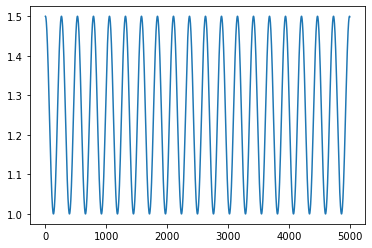

In [60]:
plt.plot(trj[:, 1, 0])

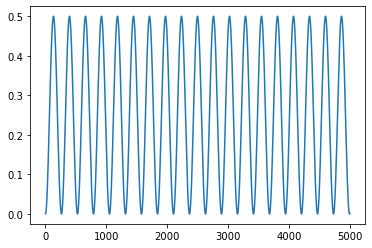

In [62]:
plt.plot(trj[:, 0, 0])